In [1]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [2]:
df = pd.read_csv("../../data/sea/dataset_all_merged.csv")
df_1 = df.drop('title', axis=1)
df_1 = df_1.drop('abstract', axis=1)
df = df_1.drop('claim', axis=1)

In [3]:
x = df.loc[:, df.columns!='valid_patent'].astype(str)
y = df['valid_patent'].astype(int)
print(x.shape, y.shape)

(1905, 13253) (1905,)


In [4]:
x = np.array(x)
y = np.array(y)
def count_values(x):
    unique, counts = np.unique(x, return_counts=True)
    return dict(zip(unique, counts))

In [5]:
plt_split = []
plt_accuracy = []
plt_precision = []
plt_recall = []
plt_f1_score = []

for i in range(1,101):

    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    total_f1 = 0

    splits = i
    # splits = 10

    skf = StratifiedShuffleSplit(n_splits=splits, random_state=42, test_size=0.3)

    for train_index, test_index in skf.split(x, y):
    #     print("TRAIN:", train_index[:15], "\nTEST:", test_index[:15])    
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
    #     print("x_train: ", count_values(x_train), "x_test: ", count_values(x_test))
    #         print("y_train: ", count_values(y_train), ", y_test: ", count_values(y_test))

    #         print('\nOriginal dataset shape {}'.format(Counter(y_train)))
        sm = SMOTE(random_state=42)
        x_res , y_res = sm.fit_sample(x_train, y_train)
    #         print('Resampled dataset shape {}'.format(Counter(y_res)))

        from sklearn.ensemble import RandomForestClassifier

        rf = RandomForestClassifier(n_estimators=5)
        rf.fit(x_res, y_res)

        y_pred_tr = rf.predict(x_test)

        accuracy = metrics.accuracy_score(y_test, y_pred_tr)
        total_accuracy += float(accuracy)

        precision = metrics.precision_score(y_test, y_pred_tr)
        total_precision += float(precision)

        recall = metrics.recall_score(y_test, y_pred_tr)
        total_recall += float(recall)

        f1_score = metrics.f1_score(y_test, y_pred_tr)
        total_f1 += float(f1_score)

#         if i % 10 == 0:
#             print('\nAccuracy: %.2f' % accuracy)
#             print('Precision: %.2f' % precision)
#             print('Recall: %.2f' % recall)
#             print('F1-score: %.2f' % f1_score)
#             print('====================================\n')
    
    plt_split.append(i)
    plt_accuracy.append(total_accuracy/splits)
    plt_precision.append(total_precision/splits)
    plt_recall.append(total_recall/splits)
    plt_f1_score.append(total_f1/splits)

    print('** '+str(i)+' splits Average Score **')
    print('Accuracy: %.2f' % (total_accuracy/splits))
    print('Precision: %.2f' % (total_precision/splits))
    print('Recall: %.2f' % (total_recall/splits))
    print('F1-score: %.2f' % (total_f1/splits))
    print('****************************')

** 1 splits Average Score **
Accuracy: 0.99
Precision: 1.00
Recall: 0.22
F1-score: 0.36
****************************
** 2 splits Average Score **
Accuracy: 0.99
Precision: 1.00
Recall: 0.22
F1-score: 0.36
****************************
** 3 splits Average Score **
Accuracy: 0.99
Precision: 1.00
Recall: 0.33
F1-score: 0.49
****************************
** 4 splits Average Score **
Accuracy: 0.99
Precision: 0.94
Recall: 0.28
F1-score: 0.42
****************************
** 5 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.40
F1-score: 0.54
****************************
** 6 splits Average Score **
Accuracy: 0.99
Precision: 0.94
Recall: 0.43
F1-score: 0.57
****************************
** 7 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.40
F1-score: 0.52
****************************
** 8 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.44
F1-score: 0.59
****************************
** 9 splits Average Score **
Accuracy: 0.99
Precision: 0.96
Reca

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 15 splits Average Score **
Accuracy: 0.99
Precision: 0.82
Recall: 0.39
F1-score: 0.52
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 16 splits Average Score **
Accuracy: 0.99
Precision: 0.77
Recall: 0.43
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 17 splits Average Score **
Accuracy: 0.99
Precision: 0.84
Recall: 0.44
F1-score: 0.57
****************************
** 18 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.48
F1-score: 0.61
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 19 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.43
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 20 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.40
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 21 splits Average Score **
Accuracy: 0.99
Precision: 0.85
Recall: 0.42
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 22 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 23 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.42
F1-score: 0.55
****************************
** 24 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 25 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.38
F1-score: 0.51
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 26 splits Average Score **
Accuracy: 0.99
Precision: 0.82
Recall: 0.41
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 27 splits Average Score **
Accuracy: 0.99
Precision: 0.84
Recall: 0.43
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 28 splits Average Score **
Accuracy: 0.99
Precision: 0.84
Recall: 0.42
F1-score: 0.54
****************************
** 29 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 30 splits Average Score **
Accuracy: 0.99
Precision: 0.85
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 31 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 32 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 33 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.40
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 34 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.41
F1-score: 0.54
****************************
** 35 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.40
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 36 splits Average Score **
Accuracy: 0.99
Precision: 0.93
Recall: 0.41
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 37 splits Average Score **
Accuracy: 0.99
Precision: 0.91
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 38 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.41
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 39 splits Average Score **
Accuracy: 0.99
Precision: 0.85
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 40 splits Average Score **
Accuracy: 0.99
Precision: 0.85
Recall: 0.40
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 41 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 42 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 43 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.40
F1-score: 0.53
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 44 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 45 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 46 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 47 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 48 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 49 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 50 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 51 splits Average Score **
Accuracy: 0.99
Precision: 0.87


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall: 0.43
F1-score: 0.56
****************************
** 52 splits Average Score **
Accuracy: 0.99
Precision: 0.92
Recall: 0.41
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 53 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.42
F1-score: 0.56
****************************
** 54 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 55 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 56 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.40
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 57 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.56
****************************
** 58 splits Average Score **
Accuracy: 0.99
Precision: 0.92
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 59 splits Average Score **
Accuracy: 0.99
Precision: 0.93
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 60 splits Average Score **
Accuracy: 0.99
Precision: 0.92
Recall: 0.42
F1-score: 0.56
****************************
** 61 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 62 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 63 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.54
****************************
** 64 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 65 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 66 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 67 splits Average Score **
Accuracy: 0.99
Precision: 0.91
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 68 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 69 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 70 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 71 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 72 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.44
F1-score: 0.58
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 73 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 74 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 75 splits Average Score **
Accuracy: 0.99
Precision: 0.91
Recall: 0.44
F1-score: 0.58
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 76 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.54
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 77 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 78 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.56
****************************
** 79 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 80 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 81 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.44
F1-score: 0.58
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 82 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 83 splits Average Score **
Accuracy: 0.99
Precision: 0.90
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 84 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.44
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 85 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 86 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 87 splits Average Score **
Accuracy: 0.99
Precision: 0.86
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 88 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 89 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 90 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 91 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 92 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 93 splits Average Score **
Accuracy: 0.99
Precision: 0.85
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 94 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.55
****************************
** 95 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.56
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 96 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 97 splits Average Score **
Accuracy: 0.99
Precision: 0.89
Recall: 0.43
F1-score: 0.57
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 98 splits Average Score **
Accuracy: 0.99
Precision: 0.87
Recall: 0.42
F1-score: 0.55
****************************


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


** 99 splits Average Score **
Accuracy: 0.99
Precision: 0.88
Recall: 0.41
F1-score: 0.55
****************************
** 100 splits Average Score **
Accuracy: 0.99
Precision: 0.84
Recall: 0.43
F1-score: 0.56
****************************


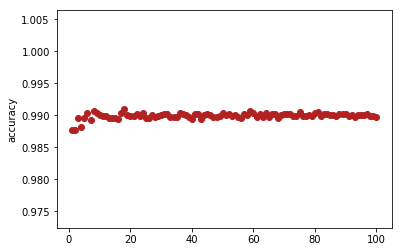

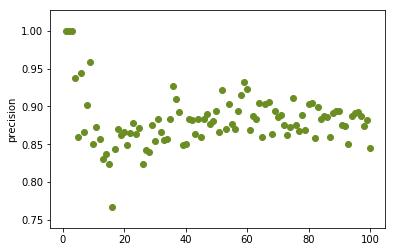

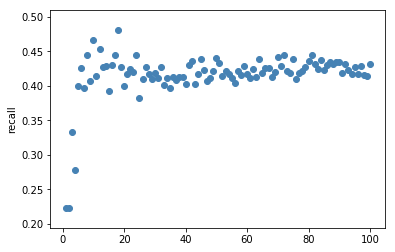

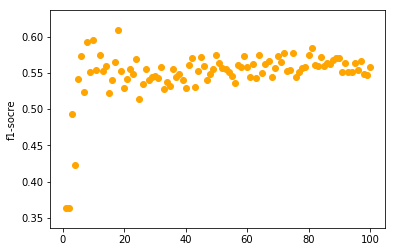

In [6]:
import matplotlib.pyplot as plt

plt.scatter(plt_split, plt_accuracy, c='firebrick')
plt.ylabel('accuracy')
plt.show()

plt.scatter(plt_split, plt_precision, c='olivedrab')
plt.ylabel('precision')
plt.show()

plt.scatter(plt_split, plt_recall, c='steelblue')
plt.ylabel('recall')
plt.show()

plt.scatter(plt_split, plt_f1_score, c='orange')
plt.ylabel('f1-socre')
plt.show()

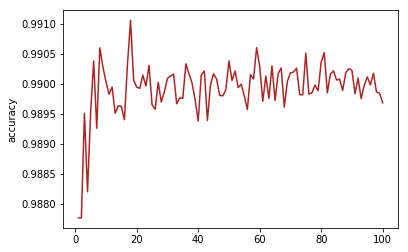

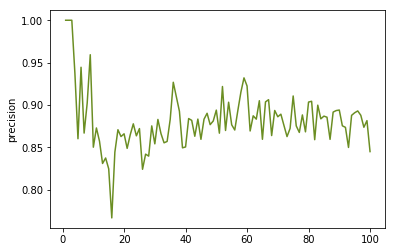

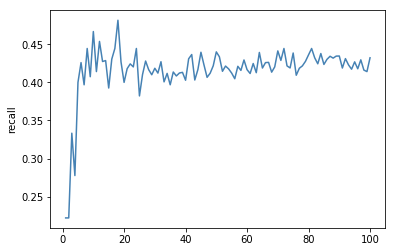

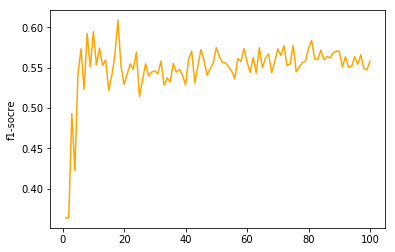

In [7]:
plt.plot(plt_split, plt_accuracy, c='firebrick')
plt.ylabel('accuracy')
plt.show()

plt.plot(plt_split, plt_precision, c='olivedrab')
plt.ylabel('precision')
plt.show()

plt.plot(plt_split, plt_recall, c='steelblue')
plt.ylabel('recall')
plt.show()

plt.plot(plt_split, plt_f1_score, c='orange')
plt.ylabel('f1-socre')
plt.show()